In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [64]:
train=pd.read_csv('bigdatamart_train.csv')
test=pd.read_csv('bigdatamart_test.csv')

In [65]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
2710,FDB32,20.60,Low Fat,0.023449,Fruits and Vegetables,93.9778,OUT035,2004,Small,Tier 2,Supermarket Type1,2816.3340
2711,NCO06,19.25,Low Fat,0.108030,Household,32.4558,OUT046,1997,Small,Tier 1,Supermarket Type1,101.8674
2712,FDY44,14.15,Regular,0.024405,Fruits and Vegetables,198.3110,OUT046,1997,Small,Tier 1,Supermarket Type1,2553.3430
2713,FDG10,6.63,Regular,0.010961,Snack Foods,58.2588,OUT045,2002,NaN,Tier 2,Supermarket Type1,343.5528


In [66]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [67]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [68]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2715 non-null   object 
 1   Item_Weight                2264 non-null   float64
 2   Item_Fat_Content           2715 non-null   object 
 3   Item_Visibility            2715 non-null   float64
 4   Item_Type                  2715 non-null   object 
 5   Item_MRP                   2715 non-null   float64
 6   Outlet_Identifier          2715 non-null   object 
 7   Outlet_Establishment_Year  2715 non-null   int64  
 8   Outlet_Size                1928 non-null   object 
 9   Outlet_Location_Type       2715 non-null   object 
 10  Outlet_Type                2715 non-null   object 
 11  Item_Outlet_Sales          2715 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 254.7+ KB


In [70]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,2264.000000,2715.000000,2715.000000,2715.000000,2715.000000
mean,12.993977,0.065638,140.101621,1997.799632,2187.767056
std,4.639848,0.050870,62.291274,8.273311,1722.122189
min,4.590000,0.000000,31.290000,1985.000000,33.290000
25%,8.895000,0.026874,92.627800,1987.000000,829.586800
50%,12.850000,0.054671,142.315400,1999.000000,1768.364800
75%,17.000000,0.093094,185.308200,2004.000000,3091.975200
max,21.350000,0.328391,265.222600,2009.000000,11445.102000


In [71]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


<AxesSubplot:>

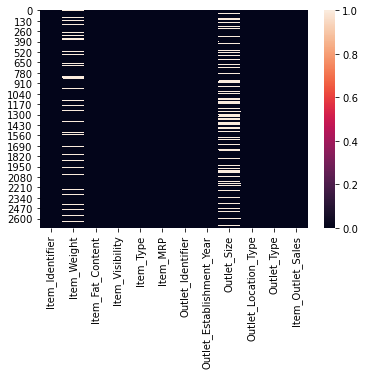

In [73]:
sns.heatmap(train.isnull())

<AxesSubplot:>

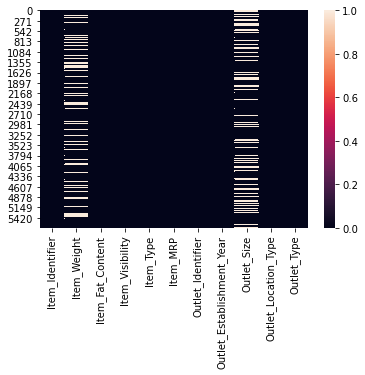

In [74]:
sns.heatmap(test.isnull())

In [75]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [76]:
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

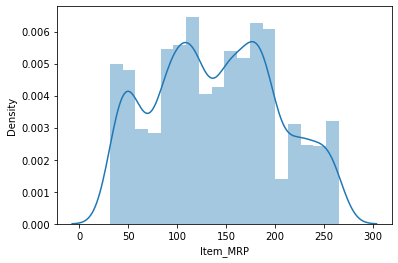

In [77]:
sns.distplot(train['Item_MRP'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

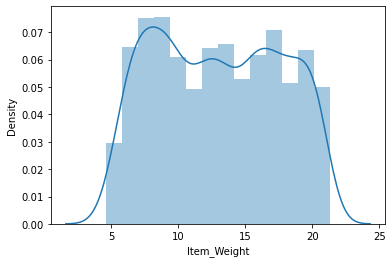

In [78]:
sns.distplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

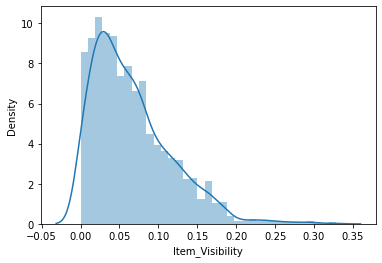

In [79]:
sns.distplot(train['Item_Visibility'])

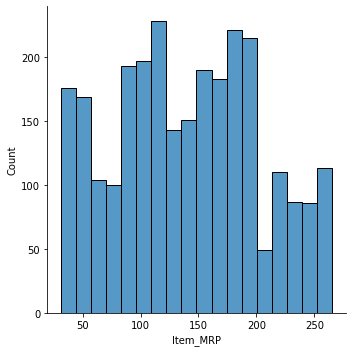

In [80]:
sns.displot(train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

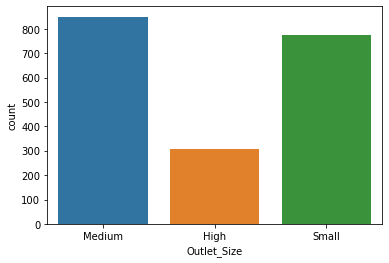

In [81]:
sns.countplot(train['Outlet_Size'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

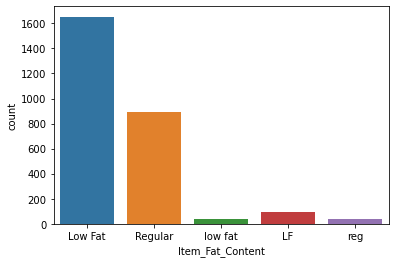

In [82]:
sns.countplot(train['Item_Fat_Content'])

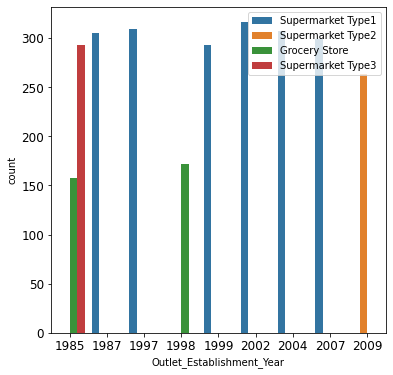

In [83]:
plt.figure(figsize=(6,6))
sns.countplot(x=train['Outlet_Establishment_Year'],hue=train['Outlet_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right')
plt.show()

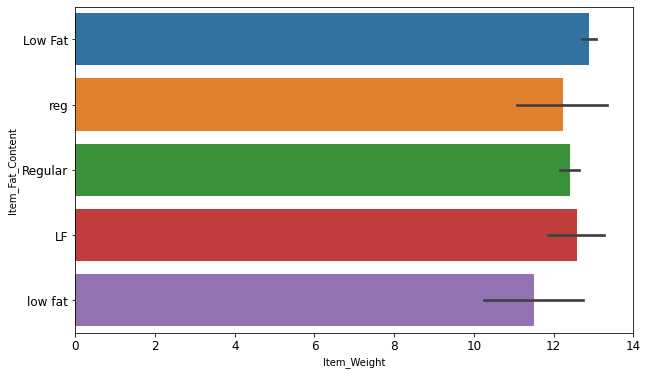

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x=test['Item_Weight'],y=test['Item_Fat_Content'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

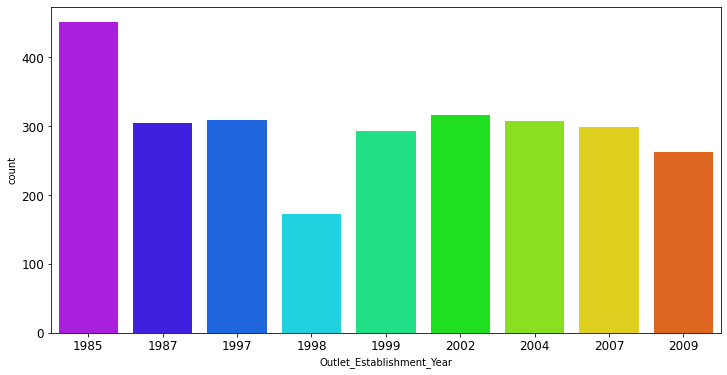

In [85]:
plt.figure(figsize=(12,6))
sns.countplot(train['Outlet_Establishment_Year'],palette='gist_rainbow_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

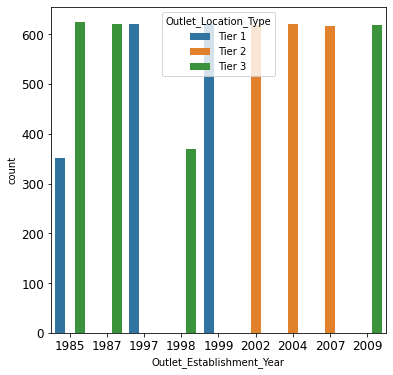

In [86]:
plt.figure(figsize=(6,6))
sns.countplot(x=test['Outlet_Establishment_Year'],hue=test['Outlet_Location_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

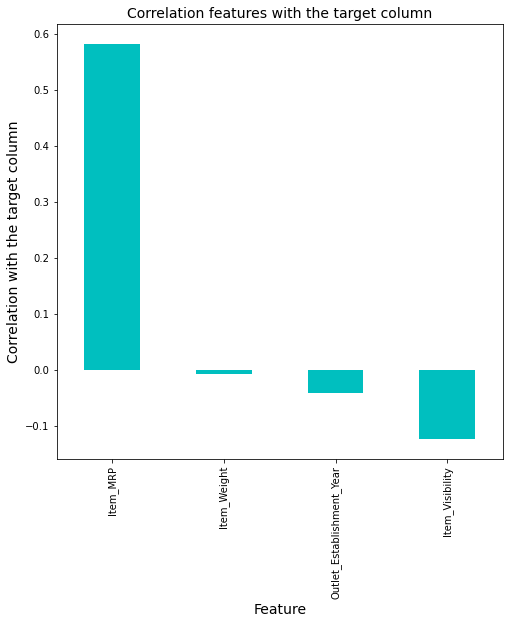

In [87]:
plt.figure(figsize=(8,8))
train.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation features with the target column',fontsize=14)
plt.show()

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Outlet_Sales            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

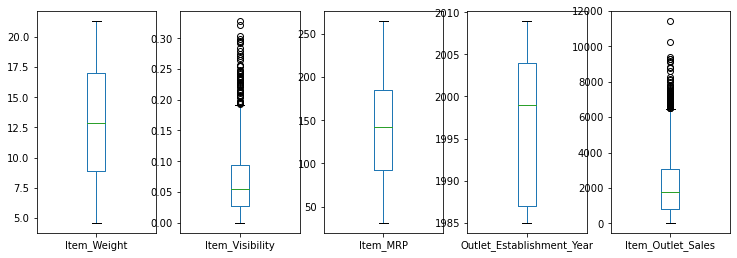

In [88]:
train.plot(kind='box',layout=(2,6),subplots=True,figsize=(15,9))

In [89]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012855,0.016538,-0.018718,-0.007144
Item_Visibility,-0.012855,1.000000,0.000145,-0.097835,-0.123042
Item_MRP,0.016538,0.000145,1.000000,0.012598,0.581857
Outlet_Establishment_Year,-0.018718,-0.097835,0.012598,1.000000,-0.041111
Item_Outlet_Sales,-0.007144,-0.123042,0.581857,-0.041111,1.000000


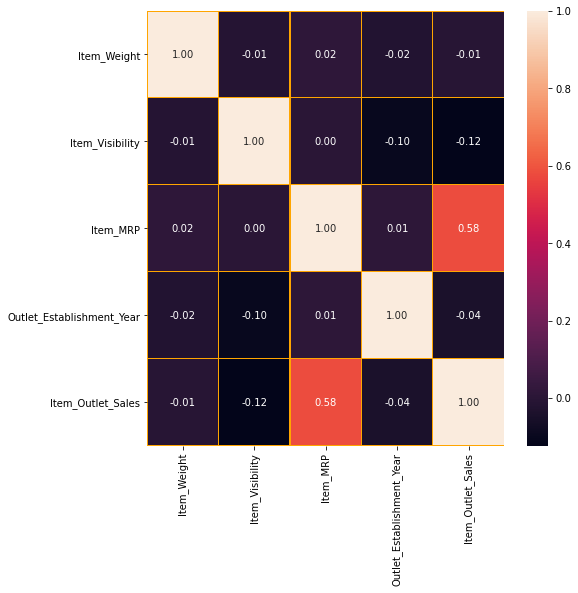

In [90]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linewidth=0.2,linecolor='orange',fmt='0.2f')
plt.show()

In [91]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [92]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [93]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [94]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [95]:
le=LabelEncoder()
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])
train['Item_Type']=le.fit_transform(train['Item_Type'])
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']=le.fit_transform(train['Outlet_Type'])
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
2710,20.60,1,0.023449,6,93.9778,2004,2,1,1,2816.3340
2711,19.25,1,0.108030,9,32.4558,1997,2,0,1,101.8674
2712,14.15,2,0.024405,6,198.3110,1997,2,0,1,2553.3430
2713,6.63,2,0.010961,13,58.2588,2002,1,1,1,343.5528


In [96]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])
test['Item_Type']=le.fit_transform(test['Item_Type'])
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=le.fit_transform(test['Outlet_Type'])
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1


# Removing Outliers

In [97]:
from scipy.stats import zscore

In [98]:
z=np.abs(zscore(train))
z.shape

(2715, 10)

In [99]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  847,  854,  891,
        935,  991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159,
       1183, 1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450,
       1496, 1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617,
       1644, 1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998,
       2062, 2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238,
       2251, 2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569,
       2586, 2613, 2660, 2678], dtype=int64), array([2, 1, 2, 2, 9, 9, 1, 2, 1, 9, 9, 9, 1, 9, 1, 2, 9, 9, 1, 2, 2, 2,
       1, 9, 9, 1, 1, 9, 9, 1, 2, 2, 1, 9, 9, 9, 9, 1, 1, 1, 1, 1, 9, 2,
       1, 1, 9, 2, 2, 2, 2, 1, 1, 2, 9, 2, 2, 9, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 9, 9, 1, 2, 9, 1, 2, 1, 1, 1, 9, 1, 9,
    

In [100]:
train_new=train[(z<3).all(axis=1)]

In [101]:
print(train.shape)
print(train_new.shape)

(2715, 10)
(2613, 10)


In [102]:
loss_percent=(8523-8338)/8523*100
print(loss_percent)

2.170597207556025


In [103]:
train.skew()

Item_Weight                  0.049584
Item_Fat_Content             1.128587
Item_Visibility              1.179179
Item_Type                    0.116026
Item_MRP                     0.107901
Outlet_Establishment_Year   -0.410588
Outlet_Size                 -0.102826
Outlet_Location_Type        -0.184369
Outlet_Type                  0.998970
Item_Outlet_Sales            1.147787
dtype: float64

In [104]:
x=train_new.drop(columns=['Item_Outlet_Sales'])             
y=train_new['Item_Outlet_Sales'] 

In [105]:
x.shape

(2613, 9)

In [106]:
y.shape

(2613,)

In [107]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.85768624, -0.54972311, -1.14460953, ..., -0.28806287,
        -1.38021735, -0.1308066 ],
       [-1.73861065,  1.17947083, -1.03436364, ..., -0.28806287,
         1.11312553,  1.078323  ],
       [ 1.04310164, -0.54972311, -1.12001724, ..., -0.28806287,
        -1.38021735, -0.1308066 ],
       ...,
       [ 0.29671503,  1.17947083, -0.86574879, ...,  1.37666552,
        -1.38021735, -0.1308066 ],
       [-1.54652387,  1.17947083, -1.32465532, ..., -0.28806287,
        -0.11293889, -0.1308066 ],
       [-0.24983229,  1.17947083, -0.80346507, ...,  1.37666552,
        -1.38021735, -0.1308066 ]])

# Best Random State

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [109]:
maxAccu=0
maxRS=0

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=r2_score(y_test,predlr_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

In [110]:
print('Best accuracy score is: ', maxAccu, 'at random state: ', maxRS)

Best accuracy score is:  0.5856462313898272 at random state:  331


# Linear Regression

In [111]:
lr=LinearRegression()
lr.fit(x_train,y_train)                            
lr_pred=lr.predict(x_test)
lr_pred                                     
print(r2_score(y_test,lr_pred)) 

0.5439389761279885


In [112]:
print(mean_absolute_error(y_test,lr_pred))
print(mean_squared_error(y_test,lr_pred))
print(np.sqrt(mean_squared_error(y_test,lr_pred)))

793.5282578717798
1081674.026657714
1040.03558913035


# Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor 
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)                           
rfr_pred=rfr.predict(x_test)
rfr_pred                                          
print(r2_score(y_test,rfr_pred)) 

0.5316131956364014


In [114]:
print(mean_absolute_error(y_test,rfr_pred))
print(mean_squared_error(y_test,rfr_pred))
print(np.sqrt(mean_squared_error(y_test,rfr_pred)))

786.5423338967496
1110908.0017578874
1053.9962057606695


# Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
scr1=cross_val_score(lr, x, y, cv=5)
scr1

array([0.54635129, 0.49026947, 0.56263807, 0.49021262, 0.51193211])

In [117]:
print("The Cross Validation Score of Linear Regression Model is: ",scr1.mean())

The Cross Validation Score of Linear Regression Model is:  0.5202807129421326


In [118]:
scr2=cross_val_score(rfr, x, y, cv=5)
scr2

array([0.5242904 , 0.51568637, 0.55689522, 0.49118354, 0.4925519 ])

In [119]:
print("The Cross Validation Score of Random Forest Regression Model is: ",scr2.mean())

The Cross Validation Score of Random Forest Regression Model is:  0.5161214849282573
